# Mount Google Drive

In [ ]:
# connect to your google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from keras.models import Model, load_model
from keras.layers import Dense, Flatten
from keras.metrics import AUC

from keras.applications.vgg19 import VGG19

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score

import random
import pickle

random.seed(0) # fix the randomness

# Data Acquisition

In [ ]:
x = pickle.load(open("/content/drive/MyDrive/image_recog_project/train_data_os.pickle", "rb"))
y = pickle.load(open("/content/drive/MyDrive/image_recog_project/target_data_os.pickle", "rb"))

In [ ]:
test_true_label = pickle.load(open("/content/drive/MyDrive/image_recog_project/final_test_target.pickle", "rb"))
test = pickle.load(open("/content/drive/MyDrive/image_recog_project/final_test.pickle", "rb"))

,has_oilpalm
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,1
497,0
498,0


Above, I loaded the following pickle objects that are saved from Data Analysis notebook:
- x: This represents the train dataset containing scaled pixel values.
- y: This serves as the true label (target) corresponding to the train dataset.
- test_true_label: These are the true labels (target) of the test dataset, used to assess evaluation metrics such as precision, recall, F1 score, and ROC-AUC for model evaluation.
- test: This dataset comprises scaled pixel values, utilized for generating predictions.

# Model Training (VGG19)

This notebook focuses on utilizing the dataset employing the oversampling method.


In [ ]:
vgg_19 = VGG19(include_top=False, weights="imagenet", input_shape=(224,224,3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Building a model

flatten_layer = Flatten()(vgg_19.layers[-1].output)

dense_layer_1 = Dense(512, activation='relu')(flatten_layer)
dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(256, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(128, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(128, activation='relu')(dense_layer_4)

output_layer = Dense(1, activation='sigmoid')(dense_layer_5)

model = Model(inputs=vgg_19.inputs, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def train_model(x, y):
  opt = Adam(learning_rate=0.0001)
  callback = EarlyStopping(monitor='val_loss', patience=5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[AUC()])
  history = model.fit(x, y, batch_size=100, epochs=30, validation_split=0.2, callbacks=[callback])
  return history

In [ ]:
history = train_model(x, y)

Epoch 1/30
8/8 [==============================] - 82s 2s/step - loss: 0.5915 - auc: 0.7468 - val_loss: 1.0689 - val_auc: 0.9779
Epoch 2/30
8/8 [==============================] - 15s 2s/step - loss: 0.3344 - auc: 0.9225 - val_loss: 0.1130 - val_auc: 0.9972
Epoch 3/30
8/8 [==============================] - 15s 2s/step - loss: 0.0894 - auc: 0.9961 - val_loss: 0.1459 - val_auc: 0.9934
Epoch 4/30
8/8 [==============================] - 15s 2s/step - loss: 0.0554 - auc: 0.9984 - val_loss: 0.1531 - val_auc: 0.9948
Epoch 5/30
8/8 [==============================] - 14s 2s/step - loss: 0.0265 - auc: 0.9997 - val_loss: 0.1558 - val_auc: 0.9877
Epoch 6/30
8/8 [==============================] - 15s 2s/step - loss: 0.0214 - auc: 0.9998 - val_loss: 0.0657 - val_auc: 0.9987
Epoch 7/30
8/8 [==============================] - 15s 2s/step - loss: 0.0068 - auc: 1.0000 - val_loss: 0.0381 - val_auc: 0.9994
Epoch 8/30
8/8 [==============================] - 15s 2s/step - loss: 0.0031 - auc: 1.0000 - val_loss: 0

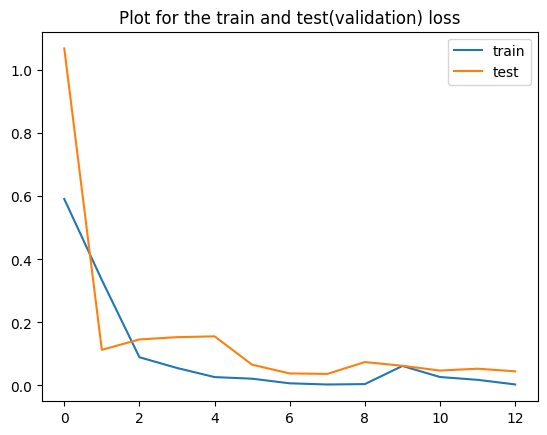

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot for the train and test(validation) loss")
plt.legend(['train','test'])
plt.show()

In [ ]:
test_pred = model.predict(test)
test_pred = np.where(test_pred < 0.5, 0, 1)
test_pred

16/16 [==============================] - 15s 505ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
def print_metric(true_label, pred_label):
  metrics = pd.DataFrame({"Precision Score":[precision_score(true_label, pred_label)],
                          "Recall Score":[recall_score(true_label, pred_label)],
                          "ROC_AUC Score":[roc_auc_score(true_label, pred_label)]})
  print(metrics)

In [ ]:
print_metric(test_true_label, test_pred)

   Precision Score  Recall Score  ROC_AUC Score
0         0.965517      0.903226       0.950547


In [ ]:
confusion_matrix(test_true_label, test_pred)

array([[468,   1],
       [  3,  28]])

In [ ]:
print(classification_report(test_true_label, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       469
           1       0.97      0.90      0.93        31

    accuracy                           0.99       500
   macro avg       0.98      0.95      0.96       500
weighted avg       0.99      0.99      0.99       500



We'll maintain the same evaluation metrics as used in the undersampling notebook:

- Precision Score: Our model achieved an impressive precision score of 96.5%, indicating that 96.5% of the algorithm's positive predictions were accurate.

- Recall Score: The model attained a commendable 90% recall score, correctly identifying 90% of actual positive instances.

- ROC_AUC Score (Area under the ROC curve): Our model demonstrated a robust discriminatory capacity, achieving approximately 95% in distinguishing between classes.

- F1 Score: The F1 score reached 93%.

- Confusion Matrix: In this case, the model yielded 1 false positive, incorrectly classifying images lacking oil palm plantations. Additionally, there were 3 false negatives, signifying images with oil palm plantations incorrectly identified as lacking them.

In summary, the evaluation scores of this model surpass those achieved by the undersampling technique, showcasing its superior performance across multiple key metrics.

In [ ]:
model.save("/content/drive/MyDrive/image_recog_project/model" + str(pd.Timestamp.now()) + ".keras")

In [ ]:
# vgg_model = load_model("/content/drive/MyDrive/image_recog_project/model2023-12-17 01:17:42.587741.keras")
# vgg_model.summary()

# Summary

With precision at approximately 96.5% and a recall score of 90%, it's evident that employing the oversampling method has enhanced model performance on precision. This outcome confirms that for this particular dataset, oversampling proves to be the more effective technique.

The notable improvement in performance with oversampling aligns with a common understanding in neural network modeling: larger datasets often lead to better results. Neural networks thrive on extensive and diverse data, and oversampling effectively increases the representation of minority classes, enabling the model to capture crucial patterns and nuances present in the data.

This observation underscores the importance of data balance and highlights how the augmentation of the dataset through oversampling positively influences the model's ability to learn and generalize effectively.